In [7]:
import pandas as pd
import numpy  as np
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt

从mask后的数据计算每月的情况，将13年的4-8月绘制热图比较<br>

此处简单地做了个减法

remains:绘制更多统计量的

In [8]:
# 读取数据
# year = "2006"
# 注释掉的是原始数据，此后的是进行了mask之后的数据
# dir_vr = "/raid52/yycheng/MPAS/VR_postprocess/VR_merge/pre/" + "daily_pre_03-15.nc"
dir_vr = "/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/mask_pre/mask_res/" + "mask_vr_pre_03-15.nc"
ds_vr = xr.open_dataset(dir_vr)
# ds_vr

# dir_rcm = "/raid52/yycheng/MPAS/RCM_postprocess/RCM_merge/pre/" + "daily_pre_03-15.nc"
dir_rcm = "/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/mask_pre/mask_res/" + "mask_rcm_pre_03-15.nc"
ds_rcm = xr.open_dataset(dir_rcm)
# ds_rcm

# obs_cmorph = "/raid52/yycheng/MPAS/REFERENCE/CMORPH/DAILY/cdo_merge_daily/*.nc"
# ds_cmorph = xr.open_mfdataset(obs_cmorph, combine='by_coords',concat_dim='time')
obs_cmorph = "/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/mask_pre/mask_res/" + "mask_sel_CMORPH_03-15.nc"
ds_cmorph = xr.open_dataset(obs_cmorph)

obs_cn051  = "/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/mask_pre/mask_res/" +  "mask_sel_CN05.1_Pre_1961_2018_daily_025x025.nc"
ds_cn051 = xr.open_dataset(obs_cn051)

# ds_cn051_time_loc_year = (ds_cn051.time.dt.year >= 2003) & (ds_cn051.time.dt.year <= 2015)
# ds_cn051_time_loc_month= (ds_cn051.time.dt.month>=    4) & (ds_cn051.time.dt.month <= 8)
# ds_cn051_sel = ds_cn051.isel(time = ds_cn051_time_loc_year & ds_cn051_time_loc_month)

# ds_cmorph
# precip_obs = ds_disk["precip_CMORPH"]
# precip_mod = ds_disk["precip_MPAS"]
# vr_mean     = ds_vr['precip_MPAS'].mean(dim=["longitude","latitude"])
# rcm_mean    = ds_rcm['precip_MPAS'].mean(dim=["longitude","latitude"])
# cmorph_mean = ds_cmorph['cmorph'].mean(dim=["lon","lat","lev"]) # remove single dimension
# cn051_mean  = ds_cn051_sel['pre'].mean(dim=['lon','lat'])


/m2data2/yycheng/anaconda3/envs/pync0326/lib/python3.9/site-packages/xarray/coding/times.py:113: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


计算每个月的时间平均之后的空间pattern的相关系数

In [9]:
# # rename coordinate name
ds_cn051['pre'].dims
rename_coords = dict(zip(ds_cn051['pre'].dims, ds_vr['precip_MPAS'].dims))
ds_cn051['pre'] = ds_cn051['pre'].rename(rename_coords)

# ds_vr['precip_MPAS'].resample(Time="1MS").mean()

vr_corr_temp = xr.corr(ds_cn051['pre'].resample(Time="1MS").mean(), \
    ds_vr['precip_MPAS'].resample(Time="1MS").mean() , dim=['latitude','longitude']).dropna(dim='Time')
vr_monmean = dict(vr_corr_temp.groupby(vr_corr_temp.Time.dt.year))

rcm_corr_temp = xr.corr(ds_cn051['pre'].resample(Time="1MS").mean(), \
    ds_rcm['precip_MPAS'].resample(Time="1MS").mean() , dim=['latitude','longitude']).dropna(dim='Time')
rcm_monmean = dict(rcm_corr_temp.groupby(rcm_corr_temp.Time.dt.year))

/m2data2/yycheng/anaconda3/envs/pync0326/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/m2data2/yycheng/anaconda3/envs/pync0326/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/m2data2/yycheng/anaconda3/envs/pync0326/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/m2data2/yycheng/anaconda3/envs/pync0326/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


为了方便不更换变量名，用计算后的变量rmsd复制到此前的vr_mean上

In [10]:
# vr_rmsd_xr = xr.DataArray(vr_rmsd, coords = ds_vr['precip_MPAS'].coords)
# rcm_rmsd_xr = xr.DataArray(rcm_rmsd, coords = ds_rcm['precip_MPAS'].coords)
# vr_mean = vr_rmsd_xr.mean(dim=["longitude","latitude"])
# rcm_mean = rcm_rmsd_xr.mean(dim=["longitude","latitude"])

In [11]:
timeseries03_15 = pd.date_range("2003","2015",freq="AS")
timeseries03_15
# cn051_pd.columns = timeseries03_15

DatetimeIndex(['2003-01-01', '2004-01-01', '2005-01-01', '2006-01-01',
               '2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01',
               '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

In [12]:
# cn051_pd = pd.DataFrame(cn051_monmean)
# cn051_pd.index = ['Apr','May','Jun','Jul','Aug']
# cn051_pd
# cn051_pd.columns = timeseries03_15

vr_pd = pd.DataFrame(vr_monmean)
vr_pd.index = ['Apr','May','Jun','Jul','Aug']
vr_pd.columns = timeseries03_15
# vr_pd

rcm_pd = pd.DataFrame(rcm_monmean)
rcm_pd.index = ['Apr','May','Jun','Jul','Aug']
# rcm_pd
rcm_pd.columns = timeseries03_15

In [13]:
compared = (vr_pd - rcm_pd)

绘图，使用seaborn的绘图版绘制<br>
打算使用的 matplotlib.dates 不能正常工作，手工添加坐标

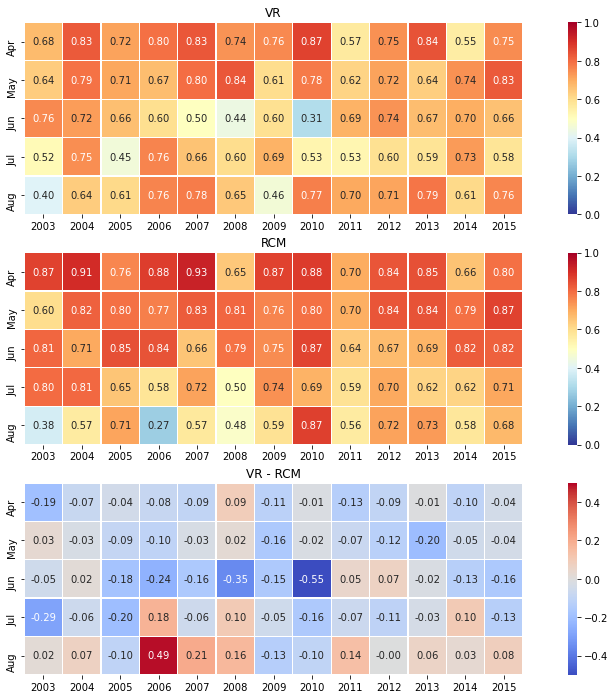

In [14]:
import seaborn as sns
import matplotlib.dates as mdates
import datetime
import matplotlib.colors as mcolors
# plt.figure(figsize=(14,4))
fig,ax = plt.subplots(3,1,figsize=(16,12))

# years = mdates.YearLocator()   # every year
# months = mdates.MonthLocator()  # every month
# years_fmt = mdates.DateFormatter('%y')
fig.patch.set_facecolor('white')
# 重新映射颜色，但其实影响不大
norm = mcolors.Normalize(vmin=-1, vmax=1)

sns.heatmap(compared, ax = ax[2], vmin=-0.5, vmax=0.5 ,fmt = ".2f", square= True, xticklabels = 1,linewidths=.2, cmap="coolwarm",
annot=True)
sns.heatmap(vr_pd, ax = ax[0], vmin = 0, vmax = 1 ,fmt = ".2f", square= True, xticklabels = 1,linewidths=.2, cmap="RdYlBu_r", 
annot=True)
sns.heatmap(rcm_pd, ax = ax[1], vmin = 0, vmax = 1 ,fmt = ".2f", square= True, xticklabels = 1,linewidths=.2, cmap="RdYlBu_r", 
annot=True)
# ax.xticks(rotation=0)
# ax[0].set_title("CN051")
ax[0].set_title("VR")
ax[1].set_title("RCM")
ax[2].set_title("VR - RCM")

xticks = pd.date_range(datetime.datetime(2003,1,1), datetime.datetime(2015,1,1), freq='ys')
for i in ax:
    i.set_xticklabels([x.strftime('%Y') for x in xticks]); 
    # rotated every ticks
    for tick in i.get_xticklabels():
        tick.set_rotation(0)

# does not work
# ax[2].xaxis.set_major_locator(years)
# ax[2].xaxis.set_major_formatter(years_fmt)
# ax[0].xaxis.set_major_formatter(dates.DateFormatter('%YY'))


# fig.title("2003-2015")
plt.savefig("./output_pic/heatplot_months_corr.png")